# **기초 통계와 데이터 시각화**  
**┗ 건강검진 데이터 시각화하기**
---
> **목차(Context)**

* 데이터 살펴보기
* EDA

In [221]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [222]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

## **데이터 준비하기**
---

> **데이터 준비하기**

- 데이터 출처 : [공공데이터 포털](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) `국민건강보험공단_건강검진정보`

- 데이터 명세  

| No. | 표준항목명          | 영문명            | 설명                                                                                                           | 표현형식/단위          | 예시         |
|-----|-----------------|------------------|---------------------------------------------------------------------------------------------------------------|---------------------|--------------|
| 1   | 기준년도          | HCHK_YEAR        | 해당 정보의 기준년도를 제공함                                                                                  | YYYY                | 2009         |
| 2   | 가입자일련번호       | IDV_ID           | 해당가입자에 부여한 일련번호                                                                                  | 1 ~ 1,000,000       | 1            |
| 3   | 시도코드          | SIDO             | 해당 수진자 거주지의 시도코드                                                                                  | -                   | 26           |
| 4   | 성별              | SEX              | 해당 정보 대상자의 성별을 제공함                                                                               | 성별 : 1(남자), 2(여자) | 1            |
| 5   | 연령대코드(5세단위)    | AGE_GROUP        | 기준년도에 수진자의 나이를 5세 단위로 그룹화하여 구분한 코드                                                     | 5세 단위 그룹화, 85세 이상은 85+로 그룹화 | -            |
| 6   | 신장(5cm단위)     | HEIGHT           | 검진자의 키(5CM 단위)                                                                                          | N/Cm                | 140          |
| 7   | 체중(5kg단위)     | WEIGHT           | 검진자의 몸무게(5KG 단위)                                                                                      | N/Kg                | 45           |
| 8   | 허리둘레          | WAIST            | 검진자의 허리둘레                                                                                              | N/Cm                | 82           |
| 9   | 시력(좌)          | SIGHT_LEFT       | 수검자의 좌측 눈의 시력                                                                                        | N                   | 0.5          |
| 10  | 시력(우)          | SIGHT_RIGHT      | 수검자의 우측 눈의 시력                                                                                        | N                   | 0.5          |
| 11  | 청력(좌)          | HEAR_LEFT        | 수검자의 좌측 귀의 청력                                                                                        | N                   | 1            |
| 12  | 청력(우)          | HEAR_RIGHT       | 수검자의 우측 귀의 청력                                                                                        | N                   | 1            |
| 13  | 수축기혈압         | BP_HIGH          | 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압                                   | N/mmHg              | 140          |
| 14  | 이완기혈압         | BP_LWST          | 검진자의 최저 혈압으로 심장의 완기시의 혈압                                                                      | N/mmHg              | 81           |
| 15  | 식전혈당(공복혈당)    | BLDS             | 검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치                                               | N/mg/dL             | 94           |
| 16  | 총콜레스테롤        | TOT_CHOLE        | 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합                                                               | N/mg/dL             | 164          |
| 17  | 트리글리세라이드    | TRIGLYCERIDE     | 단순지질 혹은 중성지질을 뜻함                                                                                    | N/mg/dL             | 94           |
| 18  | HDL콜레스테롤      | HDL_CHOLE        | HDL(고밀도 리포단백질)에 포함되는 콜레스테롤                                                                      | N/mg/dL             | 45           |
| 19  | LDL콜레스테롤      | LDL_CHOLE        | LDL(저밀도 리포단백질)에 함유된 콜레스테롤                                                                        | N/mg/dL             | 150, 130     |
| 20  | 혈색소            | HMG              | 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행       | N/g/dL              | 15.3984375   |
| 21  | 요단백            | OLIG_PROTE_CD    | 소변에 단백질이 섞여 나오는 것                                                                                  | N                   | 1            |
| 22  | 혈청크레아티닌       | CREATININE       | 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함 | N/mg/dL             | 0.8          |
| 23  | 혈청지오티(AST)    | AST              | 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함 | N/IU/L              | 12           |
| 24  | 혈청지피티(ALT)    | ALT              | 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함        | N/U/L               | 15           |
| 25  | 감마지티피         | GAMMA_GTP        | 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함 | N/U/L               | 119, 114     |
| 26  | 흡연상태           | SMK_STAT_TYPE_CD | 해당 수검자의 흡연 상태 여부                                                                                    | N                   | 1            |
| 27  | 음주여부           | DRK_YN           | 해당 수검자의 음주 상태 여부                                                                                    | N/Y                 | 1            |
| 28  | 구강검진수검여부     | HCHK_OE_INSPEC_YN | 해당 검진자가 구강검진을 선택하여 검진하였는지 여부에 대한 항목                                                   | N/Y                 | 1            |
| 29  | 치아우식증유무       | CRS_YN           | 해당 수검자의 치아우식증 유무                                                                                   | N                   | 1            |
| 30  | 치석              | TTR_YN           | 해당 수검자의 치석 여부                                                                                         | N/Y                 | 1            |

     


In [223]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [224]:
# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

### 데이터 불러오기
: 제공된 `./국민건강보험공단_건강검진정보_20221231.CSV` 파일. 한글 폰트가 깨질 경우, 인코딩을 확인

In [225]:
df = pd.read_csv("../data/국민건강보험 데이터.csv", encoding='euc-kr')
df

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,1.0,1.0,128.0,84.0,88.0,245.0,150.0,35.0,180.0,15.8,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0
999996,2022,1686113,27,2,15,150,85,116.0,0.6,0.7,1.0,1.0,136.0,81.0,134.0,240.0,108.0,73.0,145.0,12.4,1.0,1.4,59.0,49.0,25.0,1.0,0.0,0,NaN,NaN
999997,2022,902951,45,1,12,165,80,98.2,0.9,1.0,2.0,1.0,119.0,83.0,181.0,205.0,191.0,47.0,120.0,15.7,1.0,1.0,48.0,82.0,60.0,2.0,1.0,0,NaN,NaN
999998,2022,3721315,47,1,6,175,65,75.4,1.2,1.2,1.0,1.0,109.0,60.0,91.0,178.0,61.0,54.0,112.0,13.7,1.0,1.1,245.0,72.0,17.0,2.0,1.0,1,1.0,0.0


## **EDA : Data 살펴보기**  
---

* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

### 전체적인 데이터 살펴보기

#### 데이터의 형태를 확인

In [226]:
# Data 형태 확인
df.shape

(1000000, 30)

#### 데이터의 타입을 확인

In [227]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   시도코드         1000000 non-null  int64  
 3   성별           1000000 non-null  int64  
 4   연령대코드(5세단위)  1000000 non-null  int64  
 5   신장(5cm단위)    1000000 non-null  int64  
 6   체중(5kg단위)    1000000 non-null  int64  
 7   허리둘레         999608 non-null   float64
 8   시력(좌)        999814 non-null   float64
 9   시력(우)        999815 non-null   float64
 10  청력(좌)        999885 non-null   float64
 11  청력(우)        999884 non-null   float64
 12  수축기혈압        994444 non-null   float64
 13  이완기혈압        994444 non-null   float64
 14  식전혈당(공복혈당)   994389 non-null   float64
 15  총콜레스테롤       345618 non-null   float64
 16  트리글리세라이드     345614 non-null   float64
 17  HDL콜레스테롤     345614 non-null   float64
 18  LDL

In [228]:
# 데이터 값 확인 - 상위 30행을 출력하여 데이터를 확인.
df.head(30)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,1.0,1.0,136.0,89.0,92.0,NaN,NaN,NaN,NaN,15.8,1.0,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,1.0,1.0,100.0,60.0,85.0,NaN,NaN,NaN,NaN,11.9,1.0,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,1.0,1.0,110.0,80.0,94.0,NaN,NaN,NaN,NaN,16.5,1.0,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,1.0,1.0,102.0,70.0,108.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,1.0,1.0,120.0,80.0,85.0,NaN,NaN,NaN,NaN,15.4,1.0,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN


#### 결측치 확인
- 각 특성 별로 결측치 개수와 비율을 확인

In [ ]:
missing_data = df.isna().sum()
type(missing_data)

pandas.core.series.Series

#### 결측치 시각화
- 데이터프레임에서 결측치가 존재하는 부분을 시각화
- 결측치가 있는 부분을 적절한 방법으로 제거
- 동일한 방법으로 시각화를 다시 진행하여 정말 제거가 되었는지 시각적으로 확인

In [230]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

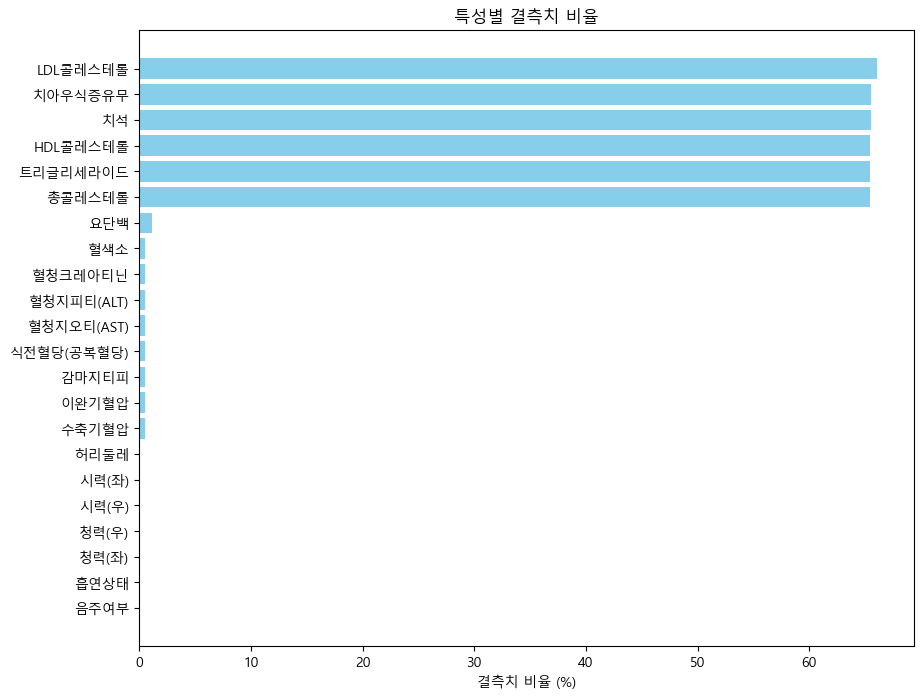

In [231]:
# 결측치가 존재하는 부분을 시각화 해보세요.
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)

plt.figure(figsize=(10, 8))
plt.barh(missing_data.index, missing_data, color='skyblue')
plt.xlabel("결측치 비율 (%)")
plt.title("특성별 결측치 비율")
plt.show()

In [232]:
df = df.drop(columns=['총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '치아우식증유무', '치석'])
df.shape

(1000000, 24)

In [233]:
df.dropna(inplace=True)
df.shape

(988125, 24)

In [3]:
# 행의 개수가 약 11000개가 사라지고, 열의 개수가 6개 사라짐.

#### 중복값 확인
- 데이터에 중복값이 있는 지 확인. 만약 있다면, 제거.

In [235]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

In [236]:
data_cleaned = df.drop_duplicates()

#### 실제값 매핑하여 컬럼 수정
- 현재 데이터는 연령대를 코드로 제공. 연령대 코드가 의미하는 바는 다음 표와 같다.
- `연령대`라는 새로운 열을 만들고, 연령대 코드를 의미하는 연령대로 매핑

In [237]:
# 연령대 코드 매핑
age_group_mapping = {
    1: "0-4", 2: "5-9", 3: "10-14", 4: "15-19", 5: "20-24",
    6: "25-29", 7: "30-34", 8: "35-39", 9: "40-44", 10: "45-49",
    11: "50-54", 12: "55-59", 13: "60-64", 14: "65-69", 15: "70-74",
    16: "75-79", 17: "80-84", 18: "85+"
}

In [238]:
# 연령대 코드를 새로운 매핑으로 업데이트 해보세요
df['연령대'] = df['연령대코드(5세단위)'].map(age_group_mapping)

In [239]:
print(df[['연령대코드(5세단위)', '연령대']].head())

   연령대코드(5세단위)    연령대
0           14  65-69
1            9  40-44
2           13  60-64
3            6  25-29
4            7  30-34


- 시도코드도 유사한 방식으로 맵핑. `시도`로 새로운 컬럼을 생성
- 시도코드에 대한 힌트는 [행정표준코드관리시스템](https://www.code.go.kr/stdcode/regCodeL.do)에서 얻음.

In [240]:
# 시도코드 열의 고유값 확인 17개
print(sorted(df['시도코드'].unique()))

[np.int64(11), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(36), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49)]


In [241]:
# 시도 코드 매핑
sido_mapping = {
    11: '서울',
    26: '부산',
    27: '대구',
    28: '인천',
    29: '광주',
    30: '대전',
    31: '울산',
    36: '세종',
    41: '경기도',
    42: '강원도',
    43: '충청북도',
    44: '충청남도',
    45: '전라북도',
    46: '전라남도',
    47: '경상북도',
    48: '경상남도',
    49: '제주도',
}


In [ ]:
df['시도'] = df['시도코드'].map(sido_mapping)

print(df[['시도코드', '시도']].head())

   시도코드   시도
0    41  경기도
1    41  경기도
2    41  경기도
3    41  경기도
4    41  경기도


- 나머지 컬럼들은 건강보험공단에서 제공하는 코드북 바탕으로 매핑

In [243]:
print(df['성별'].unique())

gender = {
    1 : '남자',
    2 : '여자'
}

df['성별'] = df['성별'].fillna(1)  
df['성별'] = df['성별'].map(gender)  

print(df[['성별']].head())

[2 1]
   성별
0  여자
1  여자
2  여자
3  여자
4  여자


In [244]:
# 흡연상태에 대한 매핑 작업
print(df['흡연상태'].unique())

smoking = {
    1 : '피우지 않는다',
    2 : '이전에 피웠으나 끊었다',
    3 : '현재도 피우고 있다'
}

df['흡연상태'] = df['흡연상태'].fillna(1)
df['흡연상태'] = df['흡연상태'].map(smoking) 

print(df[['흡연상태']].head())

[1. 3. 2.]
      흡연상태
0  피우지 않는다
1  피우지 않는다
2  피우지 않는다
3  피우지 않는다
4  피우지 않는다


In [245]:
# 음주 여부에 대한 매핑 작업
drinking = {
    0 : '마시지 않는다',
    1 : '마신다'
}

df['음주여부'] = df['음주여부'].fillna(0) 
df['음주여부'] = df['음주여부'].map(drinking) 

print(df[['음주여부']].head())

      음주여부
0  마시지 않는다
1      마신다
2      마신다
3      마신다
4      마신다


In [246]:
# 구강검진수검여부에 대한 매핑 작업
teeth = {
    0 : '미수검',
    1 : '수검'
}

df['구강검진수검여부'] = df['구강검진수검여부'].fillna(0)  
df['구강검진수검여부'] = df['구강검진수검여부'].map(teeth) 

print(df[['구강검진수검여부']].head())

  구강검진수검여부
0      미수검
1      미수검
2      미수검
3      미수검
4      미수검


In [247]:
df.head(3)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,연령대,시도
0,2022,702763,41,여자,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,14.8,1.0,0.8,25.0,20.0,15.0,피우지 않는다,마시지 않는다,미수검,65-69,경기도
1,2022,765435,41,여자,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,13.1,1.0,0.8,19.0,10.0,7.0,피우지 않는다,마신다,미수검,40-44,경기도
2,2022,343621,41,여자,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,13.0,1.0,0.8,17.0,15.0,15.0,피우지 않는다,마신다,미수검,60-64,경기도


#### 이상치 탐지
- 사분위수를 이용하여 이상치를 탐지
- 데이터프레임과 이상치 삭제 대상 컬럼을 패러미터로 받고, 각 컬럼 별 이상치를 삭제한 이후의 데이터 프레임을 반환하는 함수를 작성

In [248]:
# 이상치 탐지 및 삭제를 위해 기존 데이터 백업
new_df = df.copy()
new_df.shape

(988125, 26)

In [249]:
# 각 열에 대해 이상치를 제거하는 함수 생성
### 나머지 수치형 변수에 대해서 (ID, 기준년도는 표면 값이 숫자이지만 그 개념상 범주형.)
cols = ['연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']

def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        q1 = dff[k].quantile(0.25)
        q3 = dff[k].quantile(0.75)
        iqr = q3 - q1
        dff = dff[(dff[k] >= q1 - (1.5*iqr)) & (dff[k] <= q3 + (1.5*iqr))]
    return dff

data = remove_out(new_df, cols)

In [250]:
data.shape

(623311, 26)

In [1]:
# 함수 실행 및 이상치 제거 전/후 데이터프레임 크기 비교
# 약 30만개의 행이 제거됨.

### 개별 데이터 파악

#### 수치형 데이터와 범주형 데이터 구분
- 수치형 데이터와 범주형 데이터는 데이터를 살펴보는데 차이가 존재. 수치형 데이터와 범주형 데이터를 구분

In [252]:
data.dtypes

# ['시도','성별', '흡연상태', '음주여부', '구강검진수검여부', '연령대']

# 범주형/ 문자형 변수 추출
# cat_cols = data.select_dtypes(include='string').columns
# cat_cols = data.select_dtypes(include='category').columns
cat_cols = data.select_dtypes(include=['object']).columns

# 수치형 변수 추출
# num_cols = [col for col in data.columns if col not in cat_cols ]
# num_cols = data.select_dtypes(include='number').columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[cat_cols]
data[num_cols]

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,2022,702763,41,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,14.8,1.0,0.8,25.0,20.0,15.0
1,2022,765435,41,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,13.1,1.0,0.8,19.0,10.0,7.0
2,2022,343621,41,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,13.0,1.0,0.8,17.0,15.0,15.0
3,2022,3393534,41,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,13.4,1.0,0.8,25.0,16.0,13.0
4,2022,1716951,41,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,14.7,1.0,0.8,22.0,22.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999966,2022,1777451,11,12,145,45,74.7,0.8,0.8,1.0,1.0,124.0,77.0,91.0,13.4,1.0,0.9,44.0,27.0,18.0
999974,2022,1064587,30,17,155,35,57.5,0.6,0.8,1.0,1.0,146.0,91.0,113.0,13.2,1.0,0.7,42.0,27.0,26.0
999982,2022,139982,11,15,150,45,54.0,0.8,0.9,1.0,1.0,152.0,86.0,105.0,14.3,1.0,0.6,41.0,41.0,32.0
999991,2022,1086446,47,12,150,40,69.1,0.6,0.6,1.0,1.0,121.0,75.0,95.0,13.1,1.0,0.6,43.0,42.0,15.0


#### 기술통계량 확인
- 수치형 데이터와 범주형 데이터의 기술통계량을 확인

In [253]:
num_cols

Index(['기준년도', '가입자일련번호', '시도코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)',
       '감마지티피'],
      dtype='object')

In [254]:
# 수치형 변수의 기술 통계량
numeric_summary = data[num_cols].describe()
numeric_summary

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
count,623311.0,6.233110e+05,623311.000000,623311.000000,623311.000000,623311.000000,623311.000000,623311.000000,623311.000000,623311.0,623311.0,623311.000000,623311.000000,623311.000000,623311.000000,623311.0,623311.000000,623311.000000,623311.000000,623311.000000
mean,2022.0,2.498655e+06,33.610148,10.251090,161.990652,61.877626,79.041167,0.938568,0.937909,1.0,1.0,120.804505,74.337509,95.391254,14.040497,1.0,0.798490,22.680272,19.894458,22.093226
std,0.0,1.443118e+06,12.639822,2.982295,9.144323,12.170761,9.619221,0.319029,0.319209,0.0,0.0,13.300336,9.323911,10.978458,1.375443,0.0,0.179717,6.096571,8.376977,10.699463
min,2022.0,1.100000e+01,11.000000,5.000000,135.000000,30.000000,53.000000,0.100000,0.100000,1.0,1.0,85.000000,50.000000,65.000000,10.100000,1.0,0.400000,4.000000,1.000000,1.000000
25%,2022.0,1.248802e+06,27.000000,8.000000,155.000000,55.000000,72.000000,0.700000,0.700000,1.0,1.0,111.000000,68.000000,88.000000,13.100000,1.0,0.700000,18.000000,14.000000,14.000000
50%,2022.0,2.497671e+06,41.000000,10.000000,160.000000,60.000000,79.000000,1.000000,1.000000,1.0,1.0,120.000000,74.000000,94.000000,14.000000,1.0,0.800000,22.000000,18.000000,19.000000
75%,2022.0,3.748052e+06,43.000000,13.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.0,1.0,130.000000,80.000000,102.000000,15.000000,1.0,0.900000,26.000000,25.000000,28.000000
max,2022.0,4.999993e+06,49.000000,18.000000,190.000000,105.000000,109.000000,1.900000,1.900000,1.0,1.0,160.000000,101.000000,129.000000,18.400000,1.0,1.200000,44.000000,46.000000,56.000000


In [2]:
# 대부분의 수치형 데이터는 비교적 정규 분포를 보이는 것으로 나타났습니다.
# 허리둘레와 감마지티피 같은 일부 데이터는 매우 높은 최대값을 보여주며, 이는 이상치가 존재할 가능성을 시사합니다.

In [ ]:
# 범주형 변수의 분포 확인

### 연령대 범주 순서 지정
data['연령대'] = pd.Categorical(data['연령대'], ordered=True, categories=sorted(data['연령대'].unique()))

categorical_summary = data[cat_cols].astype('category').describe()
categorical_summary

,성별,흡연상태,음주여부,구강검진수검여부,연령대,시도
count,623311,623311,623311,623311,623311,623311
unique,2,3,2,2,14,17
top,여자,피우지 않는다,마신다,미수검,50-54,경기도
freq,350549,435482,404005,400867,80491,166329


#### 데이터 분포 확인
- 각 데이터가 어떻게 분포되어 있는지 확인
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지, 아니라면 그 이유가 무엇인지 확인

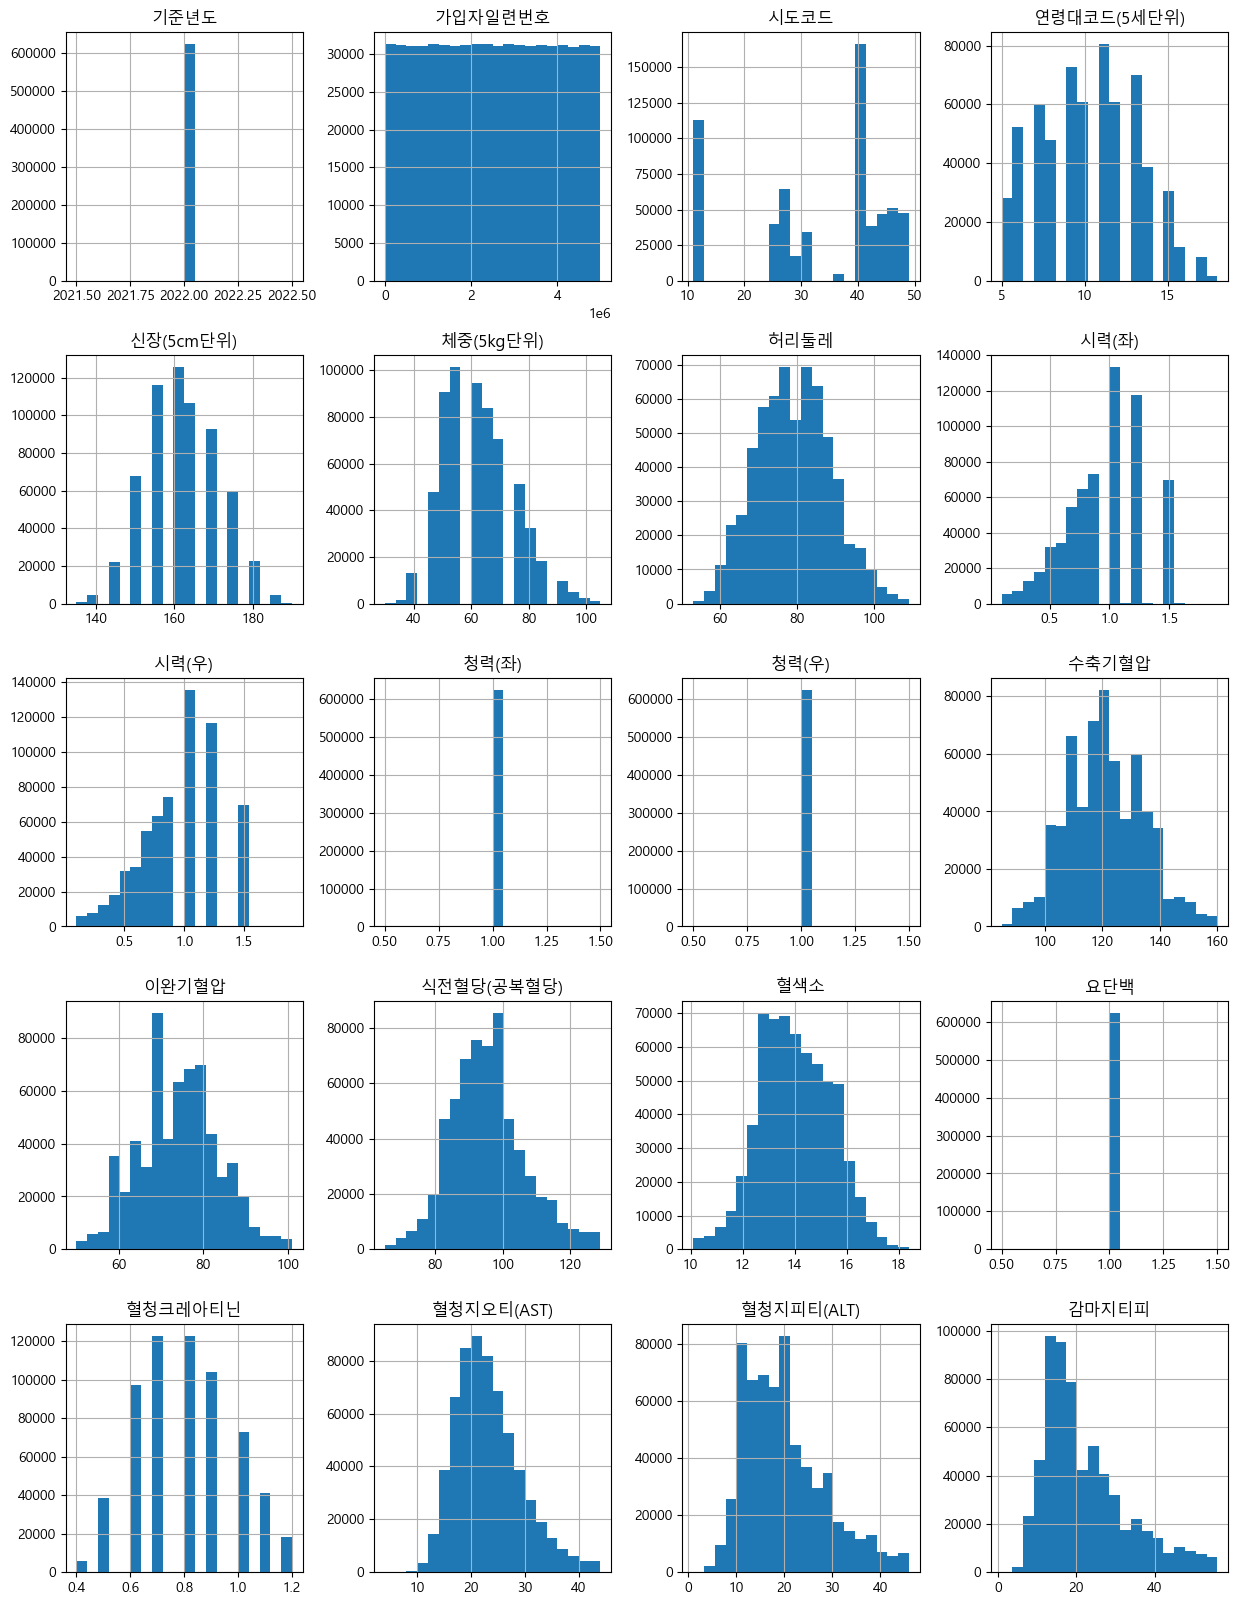

In [257]:
#수치형 데이터

data[num_cols].hist(bins=20, figsize=(15, 20))
plt.show()

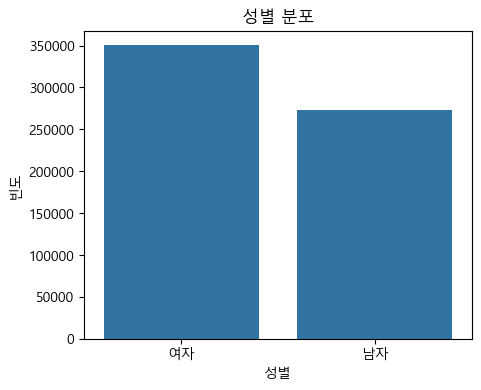

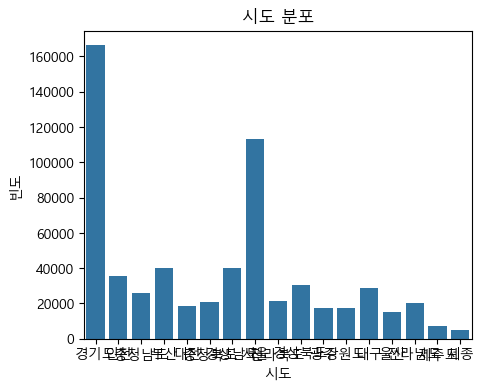

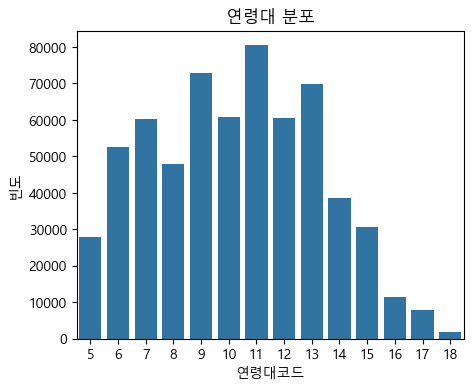

In [258]:
# 범주형 데이터 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x='성별', data=data)
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('빈도')
plt.show()

# 범주형 데이터 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x='시도', data=data)
plt.title('시도 분포')
plt.xlabel('시도')
plt.ylabel('빈도')
plt.show()

# 연령대코드의 분포를 더 크게 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x='연령대코드(5세단위)', data=data)
plt.title('연령대 분포')
plt.xlabel('연령대코드')
plt.ylabel('빈도')
plt.show()

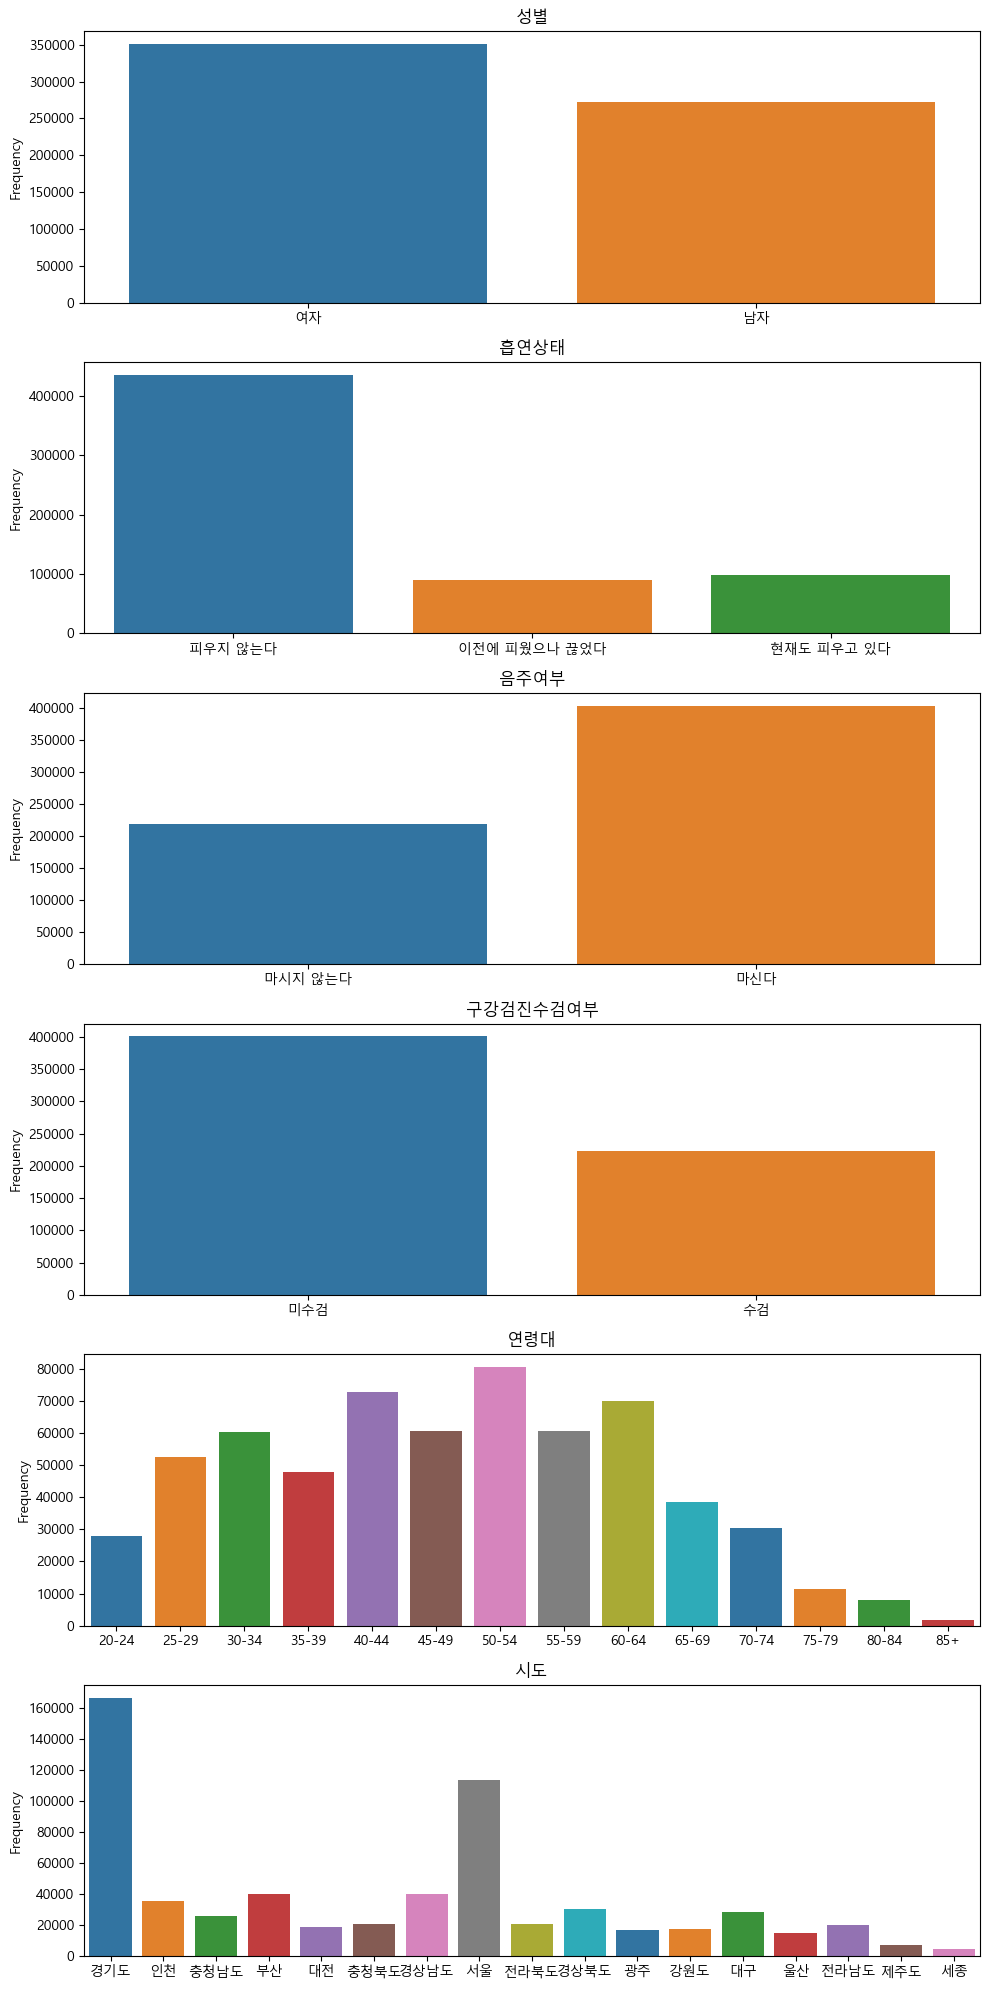

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 20))

for idx, col in enumerate(cat_cols):
    sns.countplot(
        data=data,
        x=col,
        ax=axes[idx],
        hue=col,
        palette="tab10",  # 색상 팔레트 지정
        legend=False
    )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 속성 간의 관계 파악

#### 상관관계 분석
- 수치형 데이터 간의 상관 관계를 계산하고 히트맵을 사용해 시각화

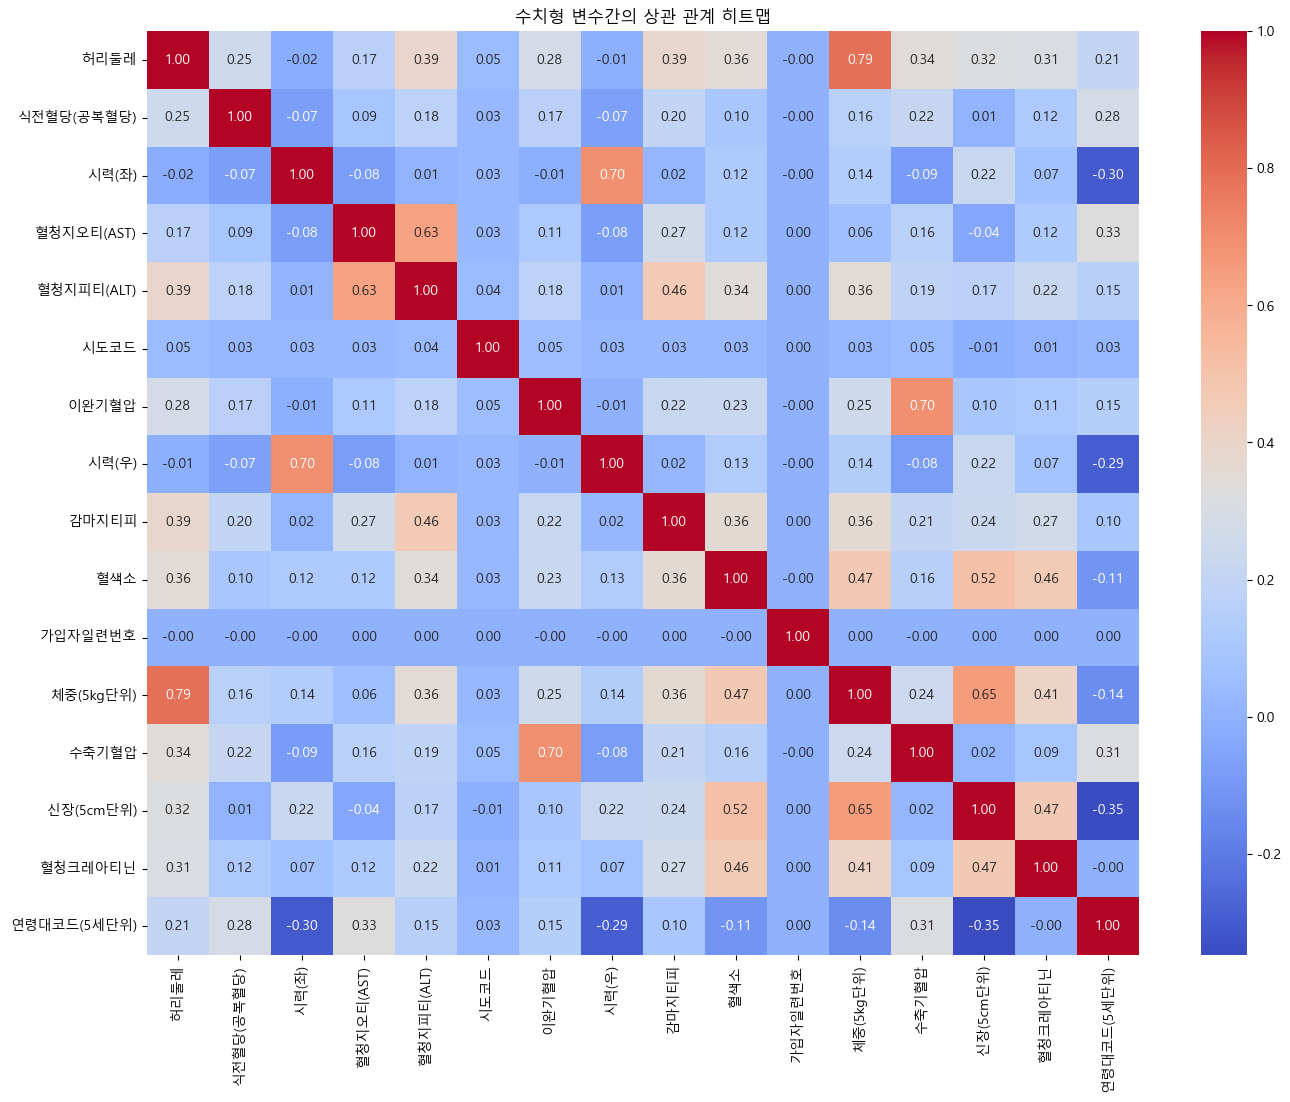

In [ ]:
import seaborn as sns

correlation_matrix = data[list(set(num_cols) - set(['기준년도', '청력(좌)', '청력(우)', '요단백']))].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('수치형 변수간의 상관 관계 히트맵')
plt.show()

In [ ]:
# 체중과 허리둘레, 신장과 체중, 신장과 혈청 크레아티닌이 높은 양의 상관관계를 보입니다.

#### 수치형 변수들 간의 산점도 및 각 변수의 히스토그램 작성

- 4가지 변수('신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압')에 대한 시각화 진행

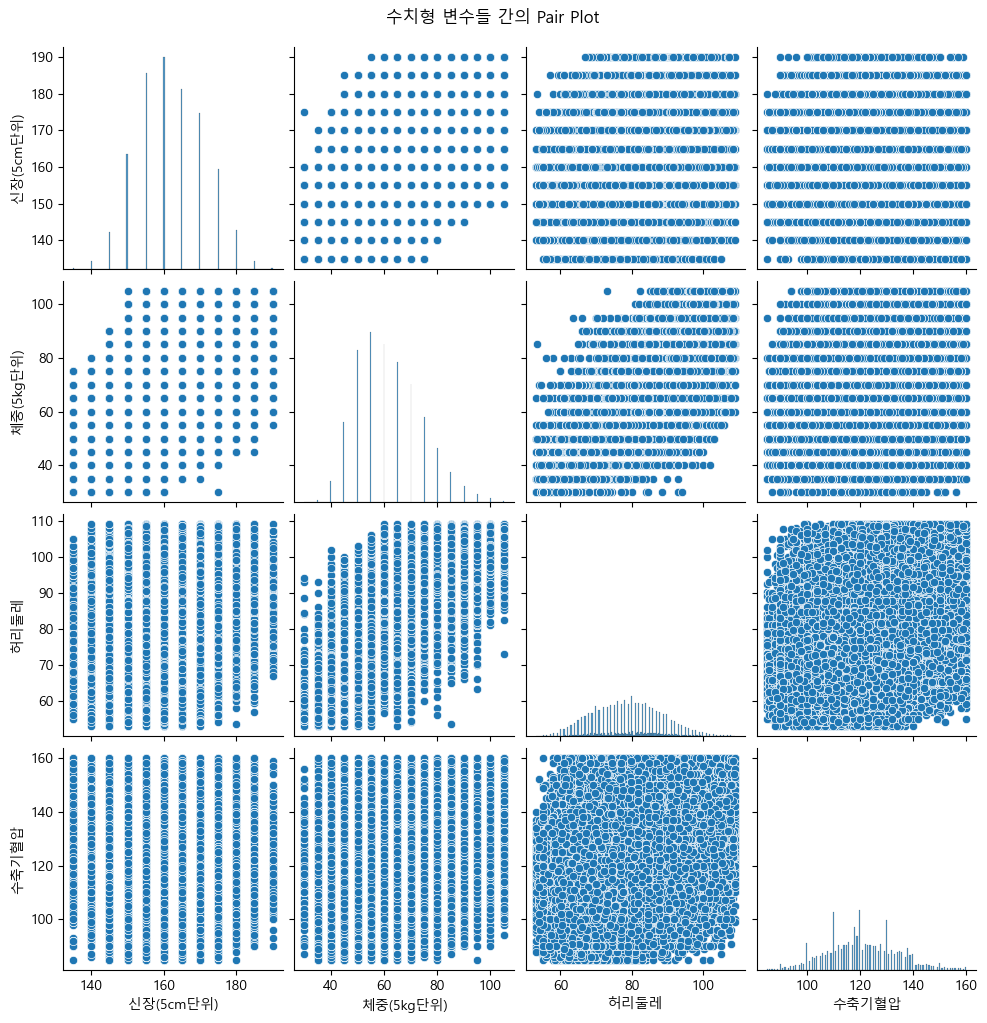

In [ ]:
pairplot_data = data[['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압']]
sns.pairplot(pairplot_data) 
plt.suptitle('수치형 변수들 간의 Pair Plot', y=1.02)  
plt.show()

#### 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 기술 통계 비교

- 범주형 변수에 따른 수치형 변수의 분포 분석, 성별이 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)에 어떻게 영향을 미치는지 파악

- 카테고리별 수치형 변수의 기술 통계 분석: 각 카테고리별로 수치형 변수의 평균, 중앙값, 분산 등을 비교

In [ ]:
gender_stats = data.groupby('성별')[['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압']].agg(['mean', 'median', 'std', 'min', 'max'])

gender_stats

신장(5cm단위)                             체중(5kg단위)                        \
          mean median       std  min  max       mean median        std min   
성별                                                                           
남자  169.365747  170.0  6.614719  135  190  69.900866   70.0  10.636038  30   
여자  156.252093  155.0  6.275622  135  185  55.634747   55.0   9.289836  30   

              허리둘레                                     수축기혈압         \
    max       mean median       std   min    max        mean median   
성별                                                                    
남자  105  83.905394   84.0  7.950831  53.0  109.0  123.281769  123.0   
여자  105  75.256314   74.1  9.088621  53.0  109.0  118.876947  118.0   

                            
          std   min    max  
성별                          
남자  12.171961  85.0  160.0  
여자  13.812067  85.0  160.0

In [ ]:
# 남성이 여성보다 신장, 체중, 허리둘레가 평균적으로 더 크고, 수축기혈압도 약간 높다.

#### 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포 비교

- 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 시각화하여 비교

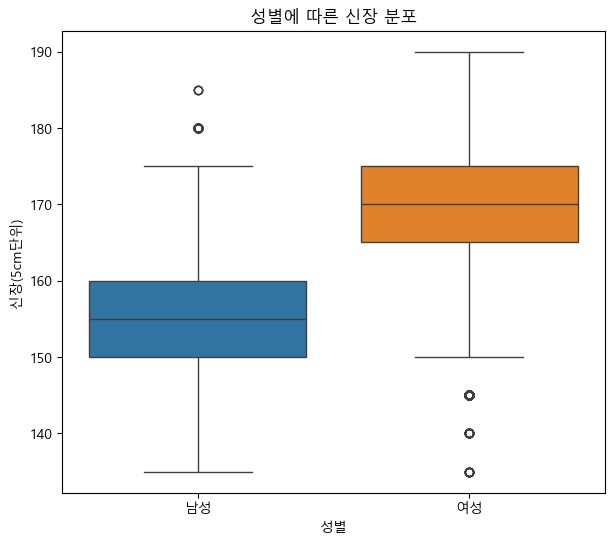

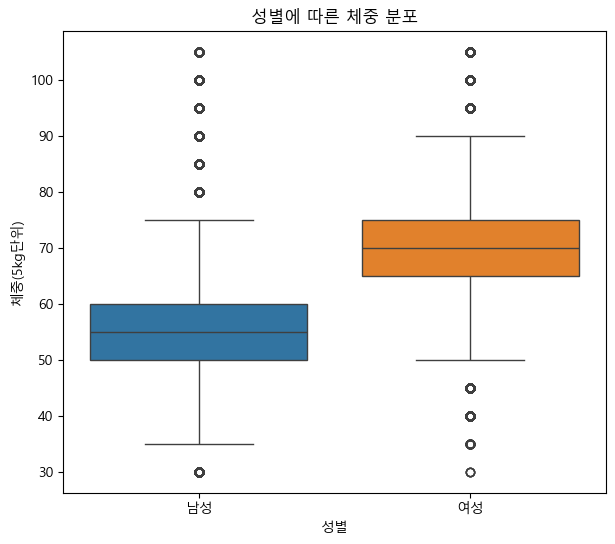

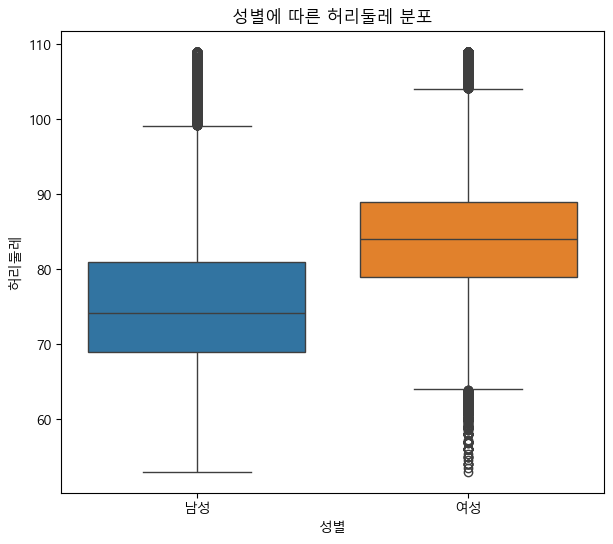

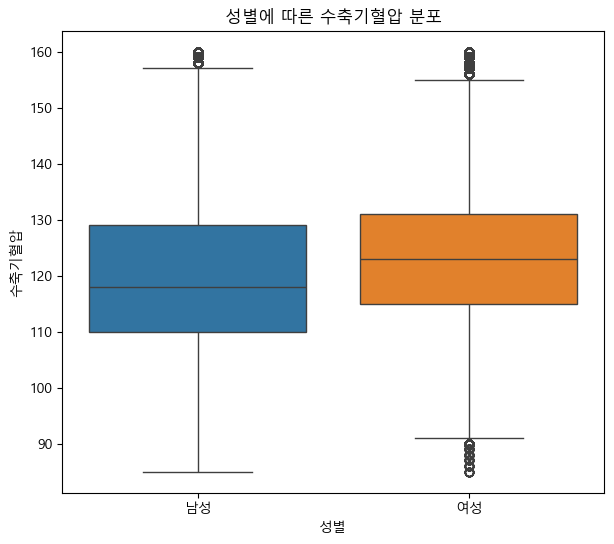

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 신장에 대한 Boxplot
plt.figure(figsize=(7, 6))  
sns.boxplot(x=data['성별'], y=data['신장(5cm단위)'], hue=data['성별'])
plt.title('성별에 따른 신장 분포')
plt.xticks([0, 1], ['남성', '여성'])
plt.show()

# 체중에 대한 Boxplot
plt.figure(figsize=(7, 6)) 
sns.boxplot(x=data['성별'], y=data['체중(5kg단위)'], hue=data['성별'])
plt.title('성별에 따른 체중 분포')
plt.xticks([0, 1], ['남성', '여성'])
plt.show()

# 허리둘레에 대한 Boxplot
plt.figure(figsize=(7, 6))  
sns.boxplot(x=data['성별'], y=data['허리둘레'], hue=data['성별'])
plt.title('성별에 따른 허리둘레 분포')
plt.xticks([0, 1], ['남성', '여성'])
plt.show()

# 수축기혈압에 대한 Boxplot
plt.figure(figsize=(7, 6))
sns.boxplot(x=data['성별'], y=data['수축기혈압'], hue=data['성별'])
plt.title('성별에 따른 수축기혈압 분포')
plt.xticks([0, 1], ['남성', '여성'])
plt.show()

In [ ]:
# 남성이 여성에 비해 평균적으로 신장이 더 크고, 체중이 더 높고, 허리둘레가 더 넓고, 수축기 혈압이 아주 약간 높은 경향을 보입니다.

#### 성별에 따른 흡연상태의 비율을 시각화

In [267]:
df['흡연상태'] = pd.Categorical(df['흡연상태'], categories=['현재도 피우고 있다', '이전에 피웠으나 끊었다', '피우지 않는다'], ordered=True)
df['흡연상태'].dtype

stacked_data = pd.crosstab(index=df['성별'], columns=df['흡연상태'])
stacked_data

stacked_data = pd.crosstab(index=df['성별'], columns=df['흡연상태'], normalize='columns')
stacked_data

stacked_data = pd.crosstab(index=df['성별'], columns=df['흡연상태'], normalize='index')
stacked_data

len(stacked_data)
cumulative = np.zeros(len(stacked_data))
cumulative

array([0., 0.])

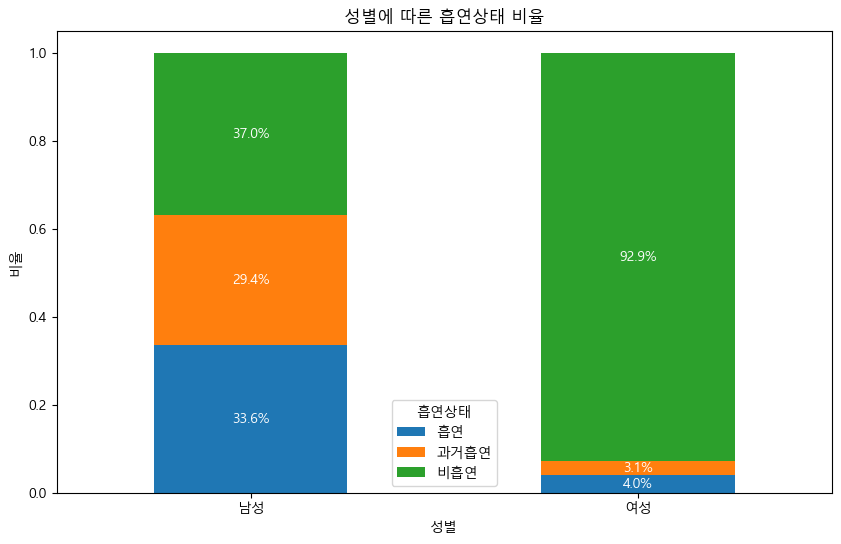

In [268]:
# Stacked Bar Chart 시각화
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('성별에 따른 흡연상태 비율')
plt.xlabel('성별')
plt.ylabel('비율')
plt.xticks(ticks=[0, 1], labels=['남성', '여성'], rotation=0)
plt.legend(title='흡연상태', labels=['흡연', '과거흡연', '비흡연'])

# 백분율 레이블 추가 ### 태블로에서는 훨씬 쉽게 할 수 있다!
cumulative = np.zeros(len(stacked_data))  # 누적 값 초기화
for idx, column in enumerate(stacked_data.columns):
    for i, value in enumerate(stacked_data[column]):
        cumulative[i] += value  # 누적 값 계산
        # if value > 0.05:  # 막대가 너무 작으면 레이블 생략
        plt.text(
            i,  # x 위치
            cumulative[i] - value / 2,  # y 위치: 막대 영역의 중앙 (위 끝 - 아래 끝 / 2)
            f'{value * 100:.1f}%',  # % 형식의 텍스트
            ha='center', va='center', color='white', fontsize=10
        )


plt.show()

In [ ]:
# 여성의 비흡연 비율이 압도적으로 높음을 알 수 있다.
# 남성은 흡연분포가 고르게 분포되어 있다.

#### 연령대별로 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)를 분석
- 연령대별로 이러한 지표들의 평균 값을 계산하여 피봇테이블을 생성

In [270]:
pivot_age = data.pivot_table(index='연령대', values=['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압'], aggfunc='mean')

# 결과 출력
pivot_age

,수축기혈압,신장(5cm단위),체중(5kg단위),허리둘레
연령대,,,,
20-24,114.617050,163.913820,60.456803,73.578155
25-29,115.821904,165.246100,62.790152,75.691863
30-34,116.417741,165.775122,64.345366,77.593564
35-39,117.699198,165.770636,65.164085,78.959340
40-44,118.320285,164.661399,64.014678,78.710780
45-49,119.795196,163.348616,63.077322,78.826496
50-54,121.071250,161.634468,61.714353,79.047629
55-59,122.727484,160.072882,60.758005,79.810642
60-64,124.539830,158.618259,59.839738,80.564612


In [ ]:
# 연령이 증가함에 따라 허리둘레와 수축기 혈압이 증가함을 알 수 있다.
# 반대로 연령이 증가함에 따라 신장은 감소함을 알 수 있다.

#### 각 지표별로 연령대에 따른 평균값의 변화 추이를 그래프로 시각화

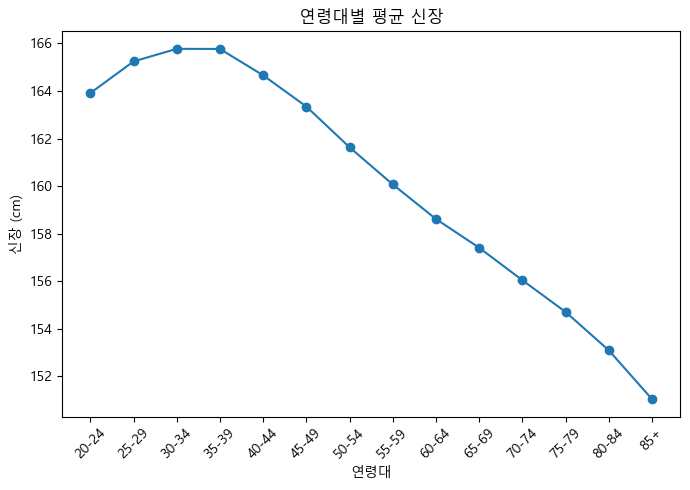

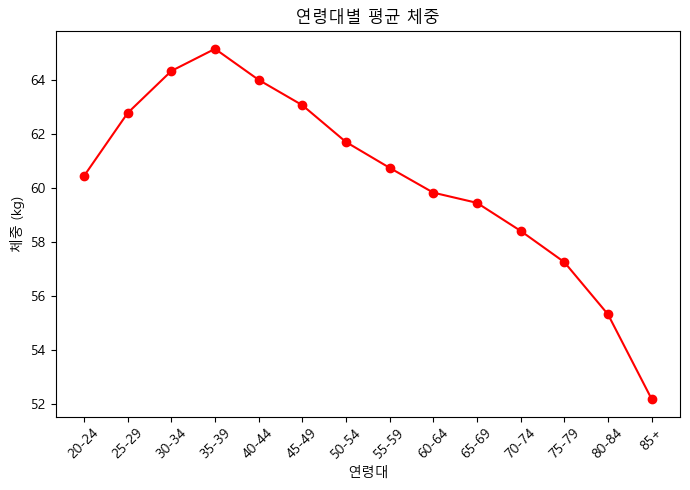

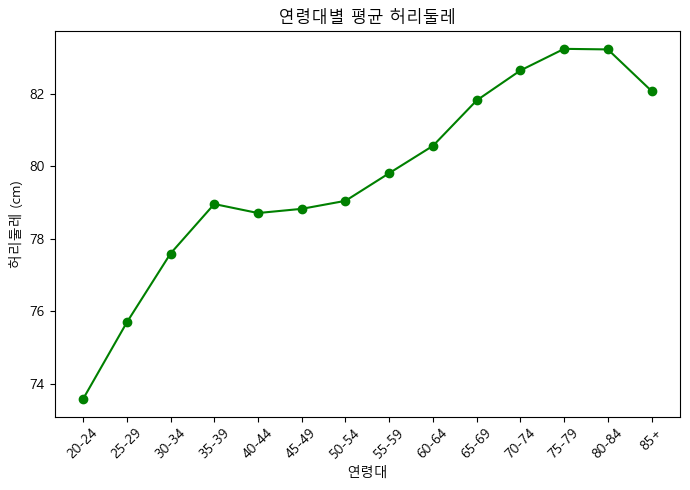

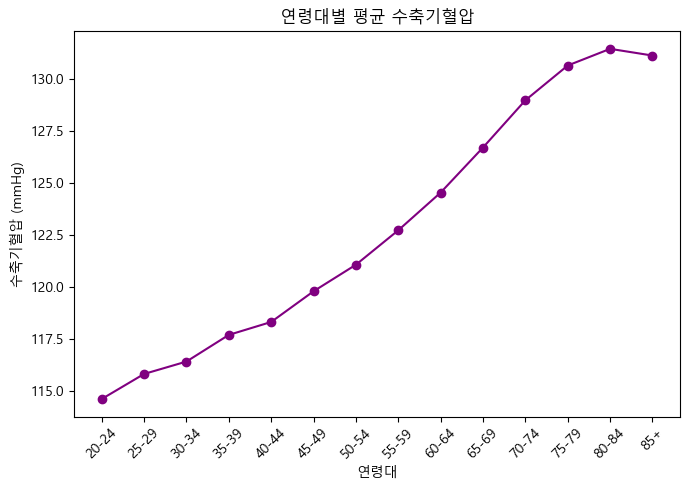

In [272]:
import matplotlib.pyplot as plt

# 신장 변화 추이
plt.figure(figsize=(7, 5))
plt.plot(pivot_age.index, pivot_age['신장(5cm단위)'], marker='o', linestyle='-')
plt.title('연령대별 평균 신장')
plt.xlabel('연령대')
plt.ylabel('신장 (cm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 체중 변화 추이
plt.figure(figsize=(7, 5))
plt.plot(pivot_age.index, pivot_age['체중(5kg단위)'], marker='o', linestyle='-', color='r')
plt.title('연령대별 평균 체중')
plt.xlabel('연령대')
plt.ylabel('체중 (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 허리둘레 변화 추이
plt.figure(figsize=(7, 5))
plt.plot(pivot_age.index, pivot_age['허리둘레'], marker='o', linestyle='-', color='g')
plt.title('연령대별 평균 허리둘레')
plt.xlabel('연령대')
plt.ylabel('허리둘레 (cm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 수축기혈압 변화 추이
plt.figure(figsize=(7, 5))
plt.plot(pivot_age.index, pivot_age['수축기혈압'], marker='o', linestyle='-', color='purple')
plt.title('연령대별 평균 수축기혈압')
plt.xlabel('연령대')
plt.ylabel('수축기혈압 (mmHg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### BMI를 계산하고, 각 범주별로 분류

체질량 지수(BMI)는 개인의 체중(kg)을 신장(m)의 제곱으로 나눈 값으로 계산하며, 비만도를 판단하는 데 널리 사용됩니다. BMI를 계산하여 각 개인의 비만도를 분류


$$BMI= \frac{체중(kg)}{신장(m)^2}$$

BMI에 따른 비만도 분류:

- 저체중: BMI < 18.5
- 정상 체중: 18.5 ≤ BMI < 25
- 과체중: 25 ≤ BMI < 30
- 비만: BMI ≥ 30

세계보건기구(WHO)의 BMI 분류:

- 저체중: BMI < 18.5
- 정상: 18.5 ≤ BMI < 24.9
- 과체중: 24.9 ≤ BMI < 30
- 비만: BMI ≥ 30

In [273]:
# BMI 계산: BMI = 체중(kg) / (신장(m)^2)
# 신장을 cm에서 m로 변환: 신장 / 100
data['BMI'] = data['체중(5kg단위)'] / ((data['신장(5cm단위)'] / 100) ** 2)

# BMI 범주화(pd.cut: 구간 나누기)
data['BMI_카테고리'] = pd.cut(data['BMI'],
                           bins=[0, 18.5, 25, 30, float('inf')], # inf 상단 지정: include_highest가 없는 이유
                           labels=['저체중', '정상 체중', '과체중', '비만'],
                           right=False) # [<=, <) 이상-미만

data[['신장(5cm단위)', '체중(5kg단위)', 'BMI', 'BMI_카테고리']]

,신장(5cm단위),체중(5kg단위),BMI,BMI_카테고리
0,160,75,29.296875,과체중
1,150,45,20.000000,정상 체중
2,150,60,26.666667,과체중
3,160,50,19.531250,정상 체중
4,160,55,21.484375,정상 체중
...,...,...,...,...
999966,145,45,21.403092,정상 체중
999974,155,35,14.568158,저체중
999982,150,45,20.000000,정상 체중
999991,150,40,17.777778,저체중


In [274]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 25:
        return '정상 체중'
    elif 25 <= bmi < 30:
        return '과체중'
    else:
        return '비만'

data['BMI_카테고리'] = data['BMI'].apply(categorize_bmi)
data['BMI_카테고리']

0           과체중
1         정상 체중
2           과체중
3         정상 체중
4         정상 체중
          ...  
999966    정상 체중
999974      저체중
999982    정상 체중
999991      저체중
999992      과체중
Name: BMI_카테고리, Length: 623311, dtype: object

In [275]:
data['BMI_카테고리'] = pd.Categorical(data['BMI_카테고리'], ordered=True, categories=['저체중', '정상 체중', '과체중', '비만'])
data['BMI_카테고리'].value_counts().sort_index()

BMI_카테고리
저체중       38428
정상 체중    403616
과체중      157202
비만        24065
Name: count, dtype: int64

#### BMI 대한 기초 통계량을 확인

In [276]:
# BMI에 관한 기초 통계량 계산
bmi_stats = data['BMI'].describe()
bmi_stats

count    623311.000000
mean         23.468340
std           3.512288
min           9.795918
25%          20.811655
50%          23.148148
75%          25.711662
max          46.666667
Name: BMI, dtype: float64

#### BMI에 대한 분포를 더 자세히 살펴보기 위해 히스토그램과 박스 플롯을 사용해 시각화

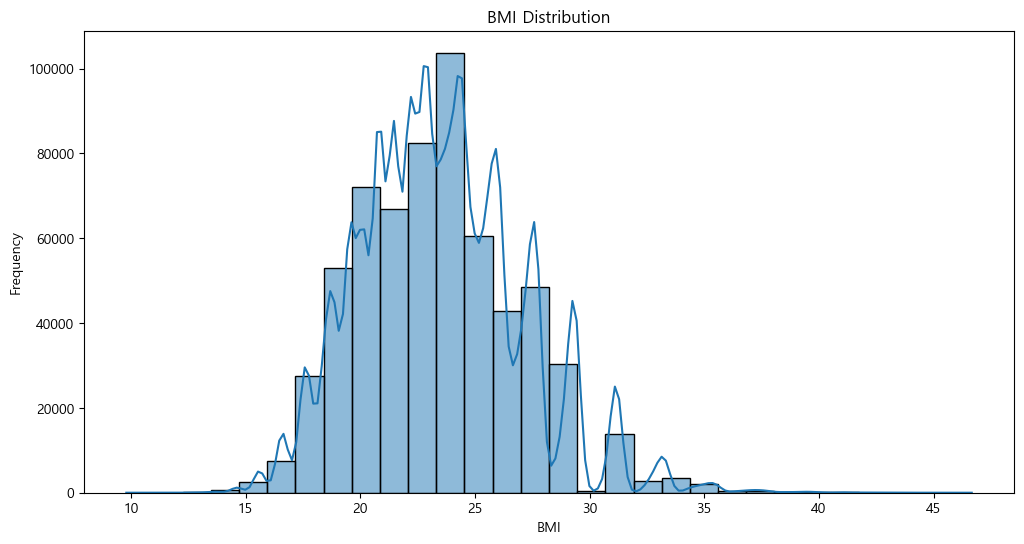

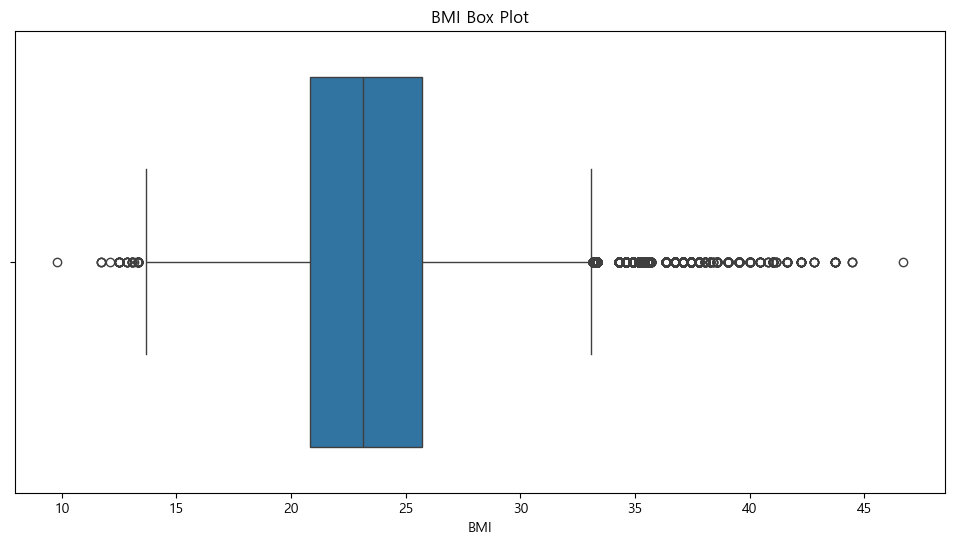

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
sns.histplot(data['BMI'], bins=30, kde=True)  
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# 박스 플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['BMI'])
plt.title('BMI Box Plot')
plt.xlabel('BMI')
plt.show()

In [ ]:
# 대부분의 데이터는 bmi 20에서 26사이에 집중되어 있습니다. 우측 꼬리를 내린 형태를 보인다.
# 이상치로 존재하는 값이 다수 존재

#### BMI 범주별 분포를 분석
- 위에서 분류한 각 범주별로 인구 분포 확인

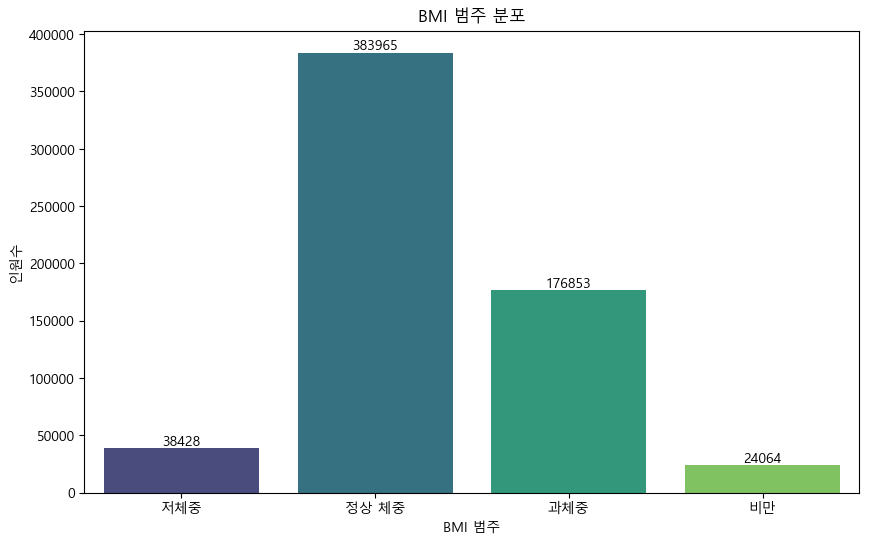

BMI_Category
저체중       6.165151
정상 체중    61.600969
과체중      28.373201
비만        3.860679
Name: proportion, dtype: float64

In [279]:
choices = ['저체중', '정상 체중', '과체중', '비만']
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 30, max(data['BMI'])], labels=choices, right=False)
data['BMI_Category'] = pd.Categorical(data['BMI_Category'], ordered=True, categories=['저체중', '정상 체중', '과체중', '비만'])

# 범주별 카운트 계산
bmi_category_counts = data['BMI_Category'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=bmi_category_counts.index, y=bmi_category_counts.values, palette="viridis")

# # Y축 범위를 설정 (최대값보다 조금 더 여유롭게 설정)
# plt.ylim(0, max(bmi_category_counts.values) + 200)

# 주석 추가
for i, value in enumerate(bmi_category_counts.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')  # y값보다 약간 위에 표시


plt.title('BMI 범주 분포')
plt.xlabel('BMI 범주')
plt.ylabel('인원수')
plt.show()

data['BMI_Category'].value_counts(normalize=True).sort_index() * 100

In [ ]:
# 정상 체중의 비율이 과체중, 저체중, 비만보다 높다

#### 비만도(BMI 범주)와 다른 건강 지표(수축기혈압, 이완기혈압, 식전혈당) 간의 관계 파악
- 기술 통계와 시각화를 모두 진행

In [281]:
bmi_detailed_stats = data.pivot_table(index='BMI_카테고리',
                                      values=['수축기혈압', '이완기혈압', '식전혈당(공복혈당)'],
                                      aggfunc=['mean', 'std', 'min', 'max'])
bmi_detailed_stats

mean                              std                       \
               수축기혈압 식전혈당(공복혈당)      이완기혈압      수축기혈압 식전혈당(공복혈당)     이완기혈압   
BMI_카테고리                                                                     
저체중       112.758015  90.749375  70.108879  12.435862   9.641416  8.917518   
정상 체중     119.421628  94.611547  73.403790  13.114502  10.699478  9.177133   
과체중       125.176111  97.957698  77.044242  12.293375  11.194819  8.923804   
비만        128.289923  99.115770  79.068772  12.115747  11.539345  8.865708   

           min                     max                    
         수축기혈압 식전혈당(공복혈당) 이완기혈압  수축기혈압 식전혈당(공복혈당)  이완기혈압  
BMI_카테고리                                                  
저체중       85.0       65.0  50.0  160.0      129.0  101.0  
정상 체중     85.0       65.0  50.0  160.0      129.0  101.0  
과체중       85.0       65.0  50.0  160.0      129.0  101.0  
비만        85.0       65.0  50.0  160.0      129.0  101.0

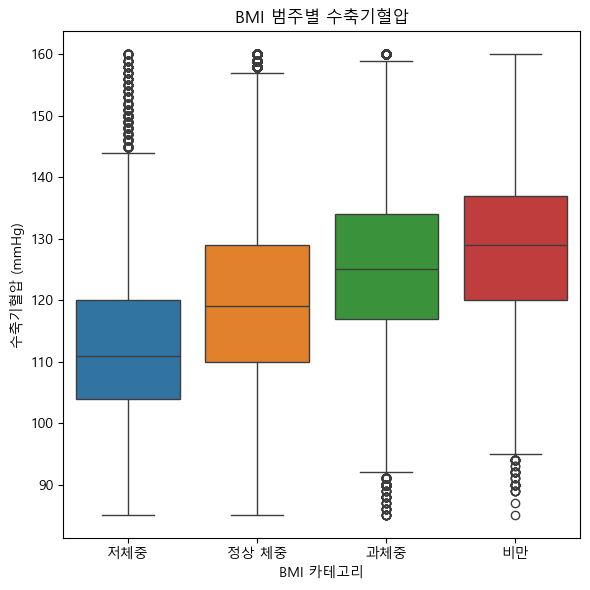

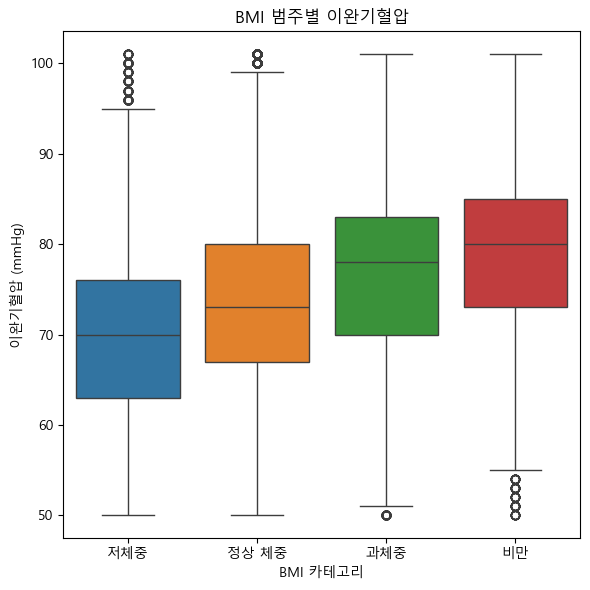

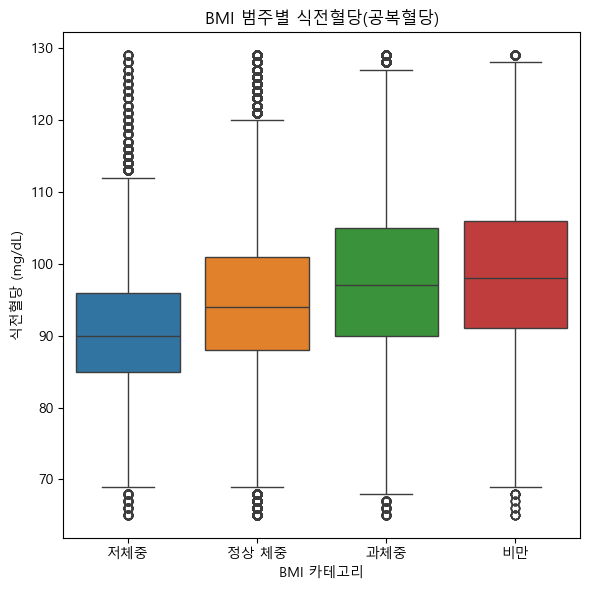

mean                              std                       \
               수축기혈압 식전혈당(공복혈당)      이완기혈압      수축기혈압 식전혈당(공복혈당)     이완기혈압   
BMI_카테고리                                                                     
저체중       112.758015  90.749375  70.108879  12.435862   9.641416  8.917518   
정상 체중     119.421628  94.611547  73.403790  13.114502  10.699478  9.177133   
과체중       125.176111  97.957698  77.044242  12.293375  11.194819  8.923804   
비만        128.289923  99.115770  79.068772  12.115747  11.539345  8.865708   

           min                     max                    
         수축기혈압 식전혈당(공복혈당) 이완기혈압  수축기혈압 식전혈당(공복혈당)  이완기혈압  
BMI_카테고리                                                  
저체중       85.0       65.0  50.0  160.0      129.0  101.0  
정상 체중     85.0       65.0  50.0  160.0      129.0  101.0  
과체중       85.0       65.0  50.0  160.0      129.0  101.0  
비만        85.0       65.0  50.0  160.0      129.0  101.0

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수축기혈압 박스 플롯
plt.figure(figsize=(6, 6))
sns.boxplot(x='BMI_카테고리', y='수축기혈압', hue='BMI_카테고리', data=data)
plt.title('BMI 범주별 수축기혈압')
plt.xlabel('BMI 카테고리')
plt.ylabel('수축기혈압 (mmHg)')
plt.tight_layout()
plt.show()

# 이완기혈압 박스 플롯
plt.figure(figsize=(6, 6))
sns.boxplot(x='BMI_카테고리', y='이완기혈압', hue='BMI_카테고리', data=data)
plt.title('BMI 범주별 이완기혈압')
plt.xlabel('BMI 카테고리')
plt.ylabel('이완기혈압 (mmHg)')
plt.tight_layout()
plt.show()

# 식전혈당(공복혈당) 박스 플롯
plt.figure(figsize=(6, 6))
sns.boxplot(x='BMI_카테고리', y='식전혈당(공복혈당)', hue='BMI_카테고리', data=data)
plt.title('BMI 범주별 식전혈당(공복혈당)')
plt.xlabel('BMI 카테고리')
plt.ylabel('식전혈당 (mg/dL)')
plt.tight_layout()
plt.show()

# 기술 통계 출력
bmi_detailed_stats

In [1]:
# 체중이 높을수록 혈압과 혈당이 높다.

#### 연령대 및 성별에 따른 BMI 변화를 분석
- 연령대가 증가함에 따라 BMI가 어떻게 변화하는지, 그리고 남성과 여성 간의 차이가 있는지를 파악
- 데이터를 성별과 연령대 코드로 그룹화하여 각 그룹의 평균 BMI를 계산하고 시각화 

In [284]:
data.groupby(['연령대', '성별'])[['BMI']].mean()

BMI
연령대   성별           
20-24 남자  23.592845
      여자  21.643807
25-29 남자  24.161311
      여자  21.697908
30-34 남자  24.585730
      여자  21.985238
35-39 남자  24.775198
      여자  22.321876
40-44 남자  24.661675
      여자  22.482005
45-49 남자  24.543865
      여자  22.689022
50-54 남자  24.435139
      여자  22.855612
55-59 남자  24.240462
      여자  23.187441
60-64 남자  24.091538
      여자  23.462472
65-69 남자  24.070931
      여자  23.851396
70-74 남자  23.788050
      여자  24.071803
75-79 남자  23.610846
      여자  24.087894
80-84 남자  23.169505
      여자  23.827139
85+   남자  22.727025
      여자  22.867877

In [285]:
t_data = data.groupby(['연령대', '성별'])[['BMI']].mean().unstack()
t_data.columns = t_data.columns.droplevel(0)
t_data

성별,남자,여자
연령대,,
20-24,23.592845,21.643807
25-29,24.161311,21.697908
30-34,24.585730,21.985238
35-39,24.775198,22.321876
40-44,24.661675,22.482005
45-49,24.543865,22.689022
50-54,24.435139,22.855612
55-59,24.240462,23.187441
60-64,24.091538,23.462472


In [286]:
data.pivot_table(values='BMI', index='연령대', columns='성별', aggfunc='mean')

성별,남자,여자
연령대,,
20-24,23.592845,21.643807
25-29,24.161311,21.697908
30-34,24.585730,21.985238
35-39,24.775198,22.321876
40-44,24.661675,22.482005
45-49,24.543865,22.689022
50-54,24.435139,22.855612
55-59,24.240462,23.187441
60-64,24.091538,23.462472


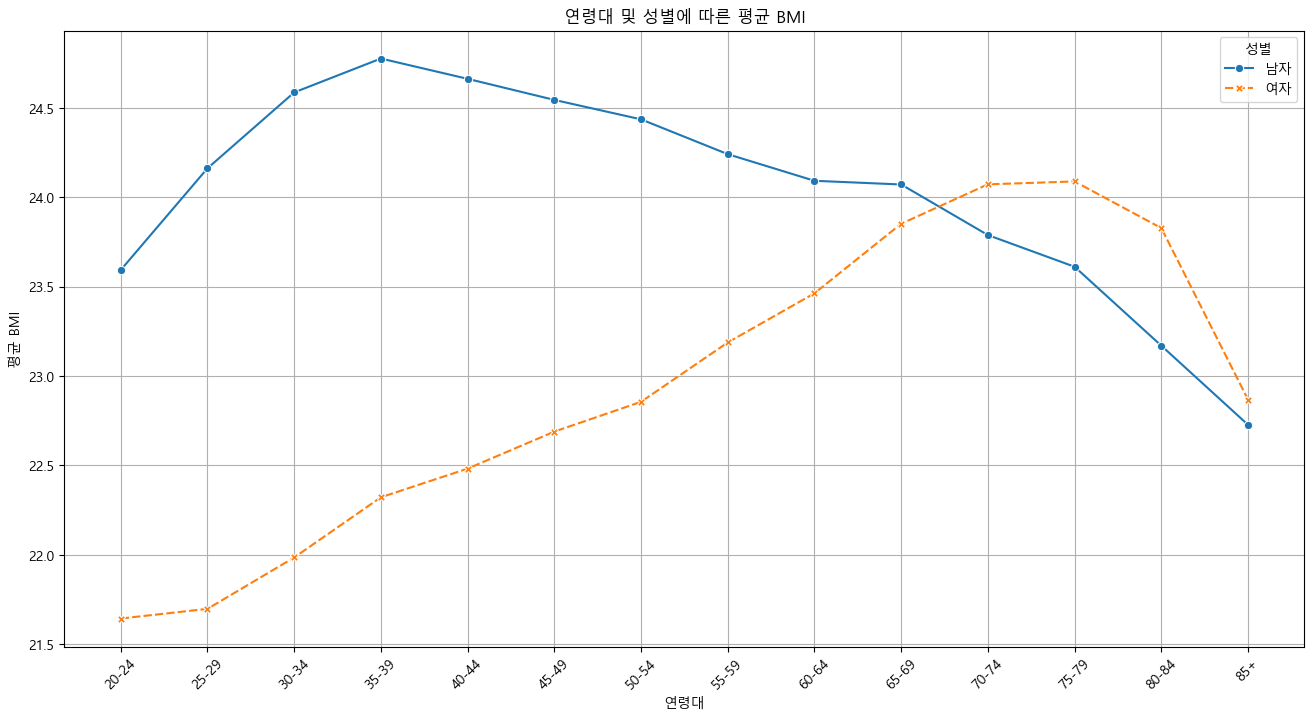

성별,남자,여자
연령대,,
20-24,23.592845,21.643807
25-29,24.161311,21.697908
30-34,24.585730,21.985238
35-39,24.775198,22.321876
40-44,24.661675,22.482005
45-49,24.543865,22.689022
50-54,24.435139,22.855612
55-59,24.240462,23.187441
60-64,24.091538,23.462472


In [ ]:
# 연령대 및 성별에 따른 BMI 평균 계산 (새로운 연령대 코드 사용)
bmi_by_age_gender = data.groupby(['연령대', '성별'])['BMI'].mean().unstack()

# 시각화
plt.figure(figsize=(16, 8))
sns.lineplot(data=bmi_by_age_gender, markers=True, dashes=True, ci=False)
plt.title('연령대 및 성별에 따른 평균 BMI')
plt.xlabel('연령대')
plt.ylabel('평균 BMI')
plt.xticks(rotation=45)
plt.legend(title='성별')
# plt.grid(True)
plt.grid()
plt.show()

bmi_by_age_gender

In [288]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
# 남성은 34세까지 나이가 증가함에 따라 bmi가 증가하지만 그 이후론 감소하는 모습을 보입니다.
# 여성은 75세까지 나이가 증가함에 따라 bmi가 증가하지만 그 이후론 감소하는 모습을 보입니다.